# Importação de Bibliotecas e Carregamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("baseEnade17_Sistemas.xlsx")

# Análise Exploratória

In [3]:
df.head()

,ID,MODALIDADE,IDADE,SEXO,TURNO,NOTA_GERAL,NOTA-FORM_GER,NOTA_COMPESPE,HorasEst,CategoriaAdm
0,1,1,21,M,4,25.1,49.3,17.0,0.0,Privada
1,2,0,31,M,3,44.3,74.2,34.3,0.0,Privada
2,3,1,22,M,4,54.9,30.0,63.2,0.0,Privada
3,4,1,27,M,4,55.3,42.5,59.5,0.0,Publica
4,5,1,28,M,4,73.2,63.7,76.3,0.0,Publica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             125 non-null    int64  
 1   MODALIDADE     125 non-null    int64  
 2   IDADE          125 non-null    int64  
 3   SEXO           125 non-null    object 
 4   TURNO          125 non-null    int64  
 5   NOTA_GERAL     125 non-null    float64
 6   NOTA-FORM_GER  125 non-null    float64
 7   NOTA_COMPESPE  125 non-null    float64
 8   HorasEst       125 non-null    float64
 9   CategoriaAdm   125 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 9.9+ KB


## Perfil dos Alunos

In [5]:
df_categoricas = df[["MODALIDADE", "SEXO", 'TURNO', 'CategoriaAdm']]

In [6]:
df_categoricas.describe()

,MODALIDADE,TURNO
count,125.000000,125.000000
mean,0.848000,3.240000
std,0.360466,1.180487
min,0.000000,1.000000
25%,1.000000,3.000000
50%,1.000000,4.000000
75%,1.000000,4.000000
max,1.000000,4.000000


C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\2965215838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_categoricas, palette=sns.color_palette(paleta_escolhida))
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\2965215838.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df_categoricas, palette=sns.color_palette(paleta_escolhida))
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\2965215838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_categoricas, palette=sns.color_palette(paleta_escolhida))
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\2965215838.py:6: User

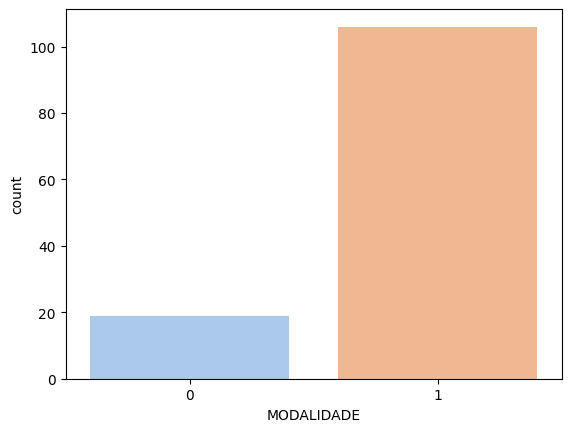

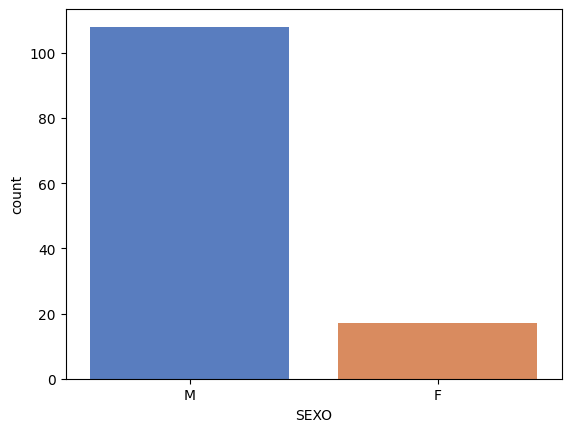

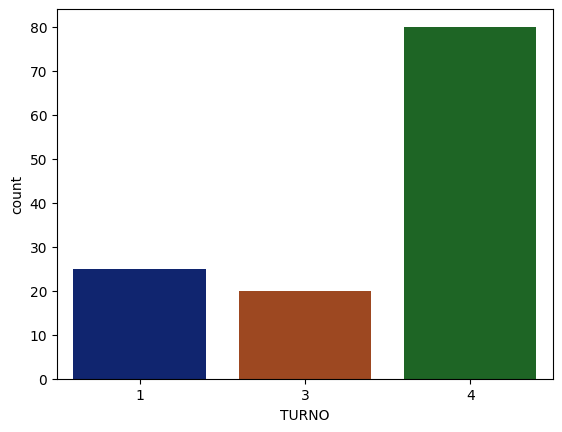

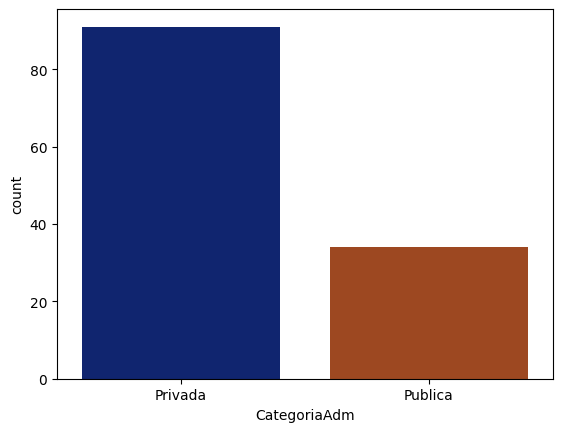

In [7]:
paletas = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']

for i, col in enumerate(df_categoricas.columns):
    plt.figure(i)
    paleta_escolhida = np.random.choice(paletas)
    sns.countplot(x=col, data=df_categoricas, palette=sns.color_palette(paleta_escolhida))

## Tabela de Contingência e Análise Cruzada

In [8]:
tabela_contingencia = pd.crosstab(df['SEXO'], df['TURNO'])

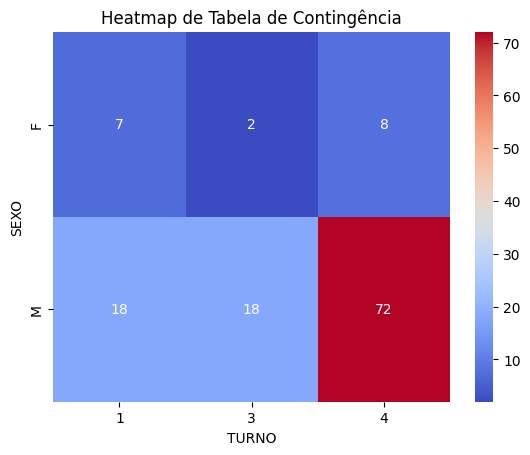

In [9]:
sns.heatmap(tabela_contingencia, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap de Tabela de Contingência')
plt.ylabel('SEXO')
plt.xlabel('TURNO')
plt.show()

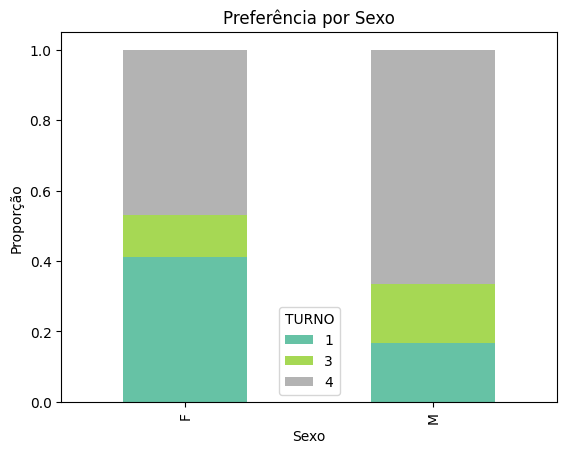

In [10]:
tabela_proporcoes = tabela_contingencia.apply(lambda r: r/r.sum(), axis=1)
tabela_proporcoes.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Preferência por Sexo')
plt.ylabel('Proporção')
plt.xlabel('Sexo')
plt.show()

## Análise de notas

In [11]:
media = df['NOTA_GERAL'].mean()
mediana = df['NOTA_GERAL'].median()
desvio_padrao = df['NOTA_GERAL'].std()
coeficiente_variacao = (desvio_padrao / media) * 100

print("==== NOTA GERAL ====")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Coeficiente de Variação: {coeficiente_variacao:.2f}%")

==== NOTA GERAL ====
Média: 38.880799999999994
Mediana: 39.6
Desvio Padrão: 13.190518931316515
Coeficiente de Variação: 33.93%


In [12]:
media = df['NOTA-FORM_GER'].mean()
mediana = df['NOTA-FORM_GER'].median()
desvio_padrao = df['NOTA-FORM_GER'].std()
coeficiente_variacao = (desvio_padrao / media) * 100

print("==== NOTA FORM GER ====")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Coeficiente de Variação: {coeficiente_variacao:.2f}%")

==== NOTA FORM GER ====
Média: 42.941599999999994
Mediana: 45.0
Desvio Padrão: 21.174555576704975
Coeficiente de Variação: 49.31%


In [13]:
media = df['NOTA_COMPESPE'].mean()
mediana = df['NOTA_COMPESPE'].median()
desvio_padrao = df['NOTA_COMPESPE'].std()
coeficiente_variacao = (desvio_padrao / media) * 100

print("==== NOTA COMPESPE ====")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Coeficiente de Variação: {coeficiente_variacao:.2f}%")

==== NOTA COMPESPE ====
Média: 37.512800000000006
Mediana: 38.3
Desvio Padrão: 14.009766040734908
Coeficiente de Variação: 37.35%


### Análise gráfica

C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\4028401822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\4028401822.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])


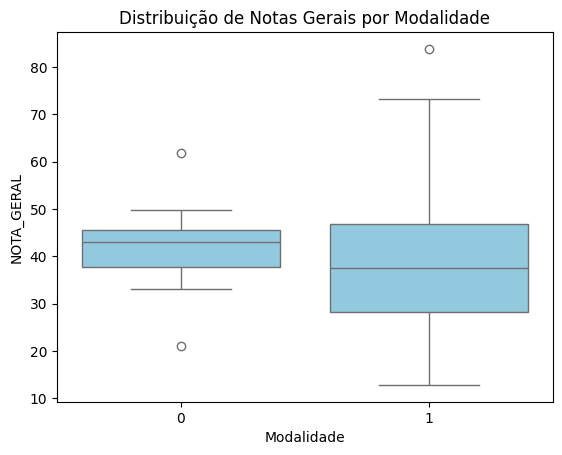

C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\4028401822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\4028401822.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])


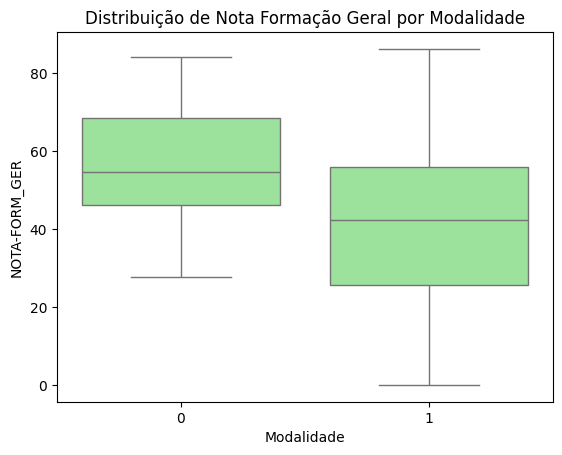

C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\4028401822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10792\4028401822.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])


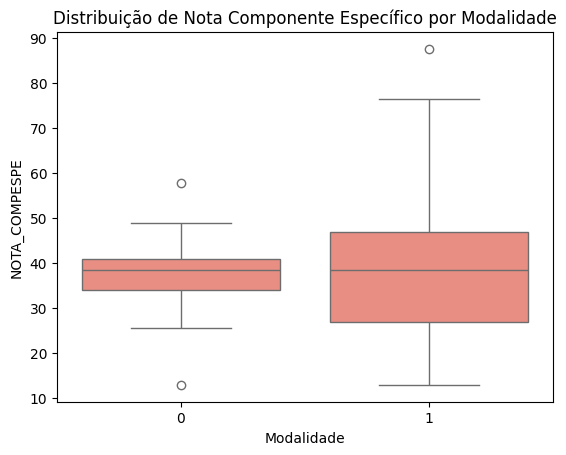

In [14]:
colunas_notas = ['NOTA_GERAL', 'NOTA-FORM_GER', 'NOTA_COMPESPE']

# Títulos para cada gráfico
titulos = ['Distribuição de Notas Gerais por Modalidade', 
           'Distribuição de Nota Formação Geral por Modalidade', 
           'Distribuição de Nota Componente Específico por Modalidade']

cores = ['skyblue', 'lightgreen', 'salmon']

for coluna, titulo, cor in zip(colunas_notas, titulos, cores):
    sns.boxplot(x='MODALIDADE', y=coluna, data=df, palette=[cor])
    plt.title(titulo)
    plt.xlabel('Modalidade')
    plt.ylabel(coluna)
    plt.show()

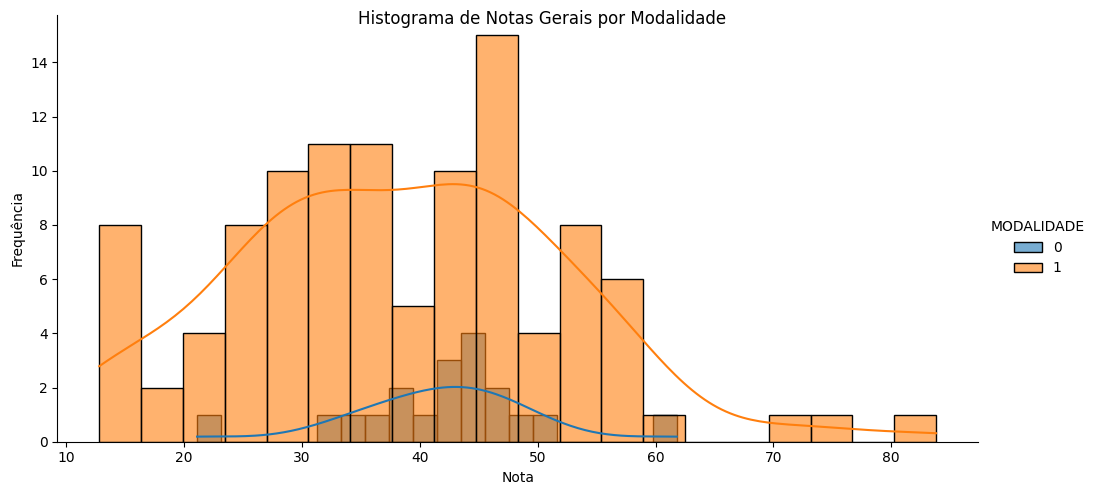

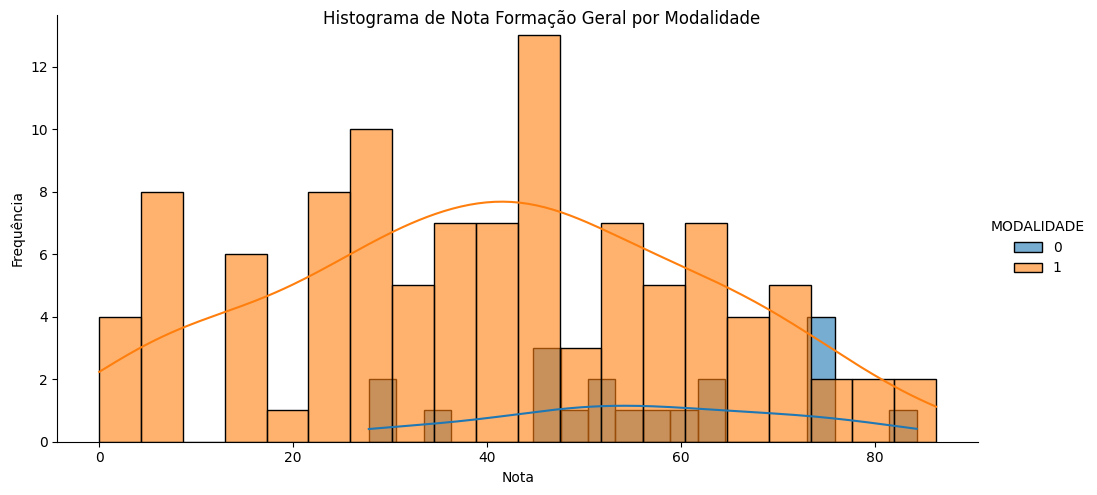

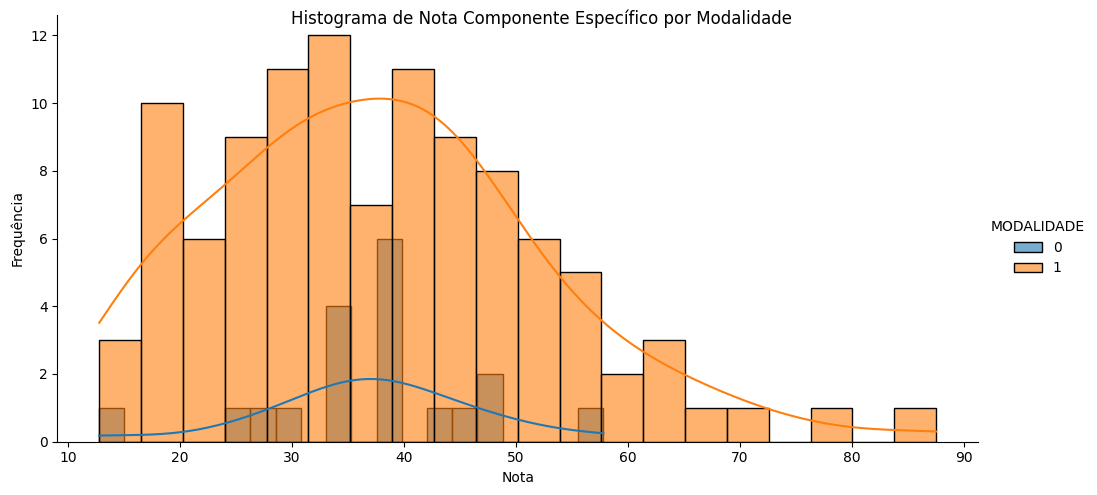

In [15]:
colunas_notas = ['NOTA_GERAL', 'NOTA-FORM_GER', 'NOTA_COMPESPE']
# Títulos para cada gráfico
titulos = ['Histograma de Notas Gerais por Modalidade', 
           'Histograma de Nota Formação Geral por Modalidade', 
           'Histograma de Nota Componente Específico por Modalidade']

# Loop para plotar cada histograma
for coluna, titulo in zip(colunas_notas, titulos):
    g = sns.FacetGrid(df, hue="MODALIDADE", height=5, aspect=2)
    g.map(sns.histplot, coluna, kde=True, bins=20, alpha=0.6).add_legend()
    g.fig.suptitle(titulo)
    g.set_axis_labels('Nota', 'Frequência')
    plt.show()